## Práctica:  IRIS clustering aglomerativo 

### Iván López de Munain Quintana

In [46]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.preprocessing import minmax_scale, StandardScaler

In [2]:
iris= load_iris()
y=iris.target
x=iris.data[:,:2]

### Escalado de los datos

In [48]:
#x = minmax_scale(x)
#normalizar
normalizar = StandardScaler()
x= normalizar.fit_transform(iris.data)

###  K-Means - Cross-validation 10-Fold estratificada

In [43]:
from sklearn.model_selection import StratifiedKFold
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import mode


In [49]:
acumul=np.empty(13)

for k in range(3,16):
        
        clustering = AgglomerativeClustering(n_clusters=k)
        clustering.fit(x)
 
        moda= -1*np.ones(k,dtype='float')
    
        for j in range(0,k):
            moda[j] = mode(y[np.argwhere(clustering.labels_ == j)])[0].astype('int')

        yPredict = moda[clustering.labels_]
        
        aciertos = 0
        for i in range(len(y)):
            if yPredict[i]==y[i]:
                aciertos+=1

        acumul[k-3] = aciertos/len(y)
        

for a in range(3,16):
    print("Tasa de aciertos para", a , "clusters : ", round(acumul[a-3],3), "%")


Tasa de aciertos para 3 clusters :  0.827 %
Tasa de aciertos para 4 clusters :  0.833 %
Tasa de aciertos para 5 clusters :  0.833 %
Tasa de aciertos para 6 clusters :  0.833 %
Tasa de aciertos para 7 clusters :  0.833 %
Tasa de aciertos para 8 clusters :  0.833 %
Tasa de aciertos para 9 clusters :  0.833 %
Tasa de aciertos para 10 clusters :  0.893 %
Tasa de aciertos para 11 clusters :  0.893 %
Tasa de aciertos para 12 clusters :  0.927 %
Tasa de aciertos para 13 clusters :  0.927 %
Tasa de aciertos para 14 clusters :  0.933 %
Tasa de aciertos para 15 clusters :  0.933 %


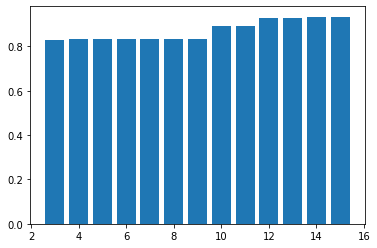

In [50]:
import matplotlib.pyplot as plt
plt.bar(np.arange(3,15+1,dtype='int'),acumul)
#plt.title
#plt.xlabel
plt.show()

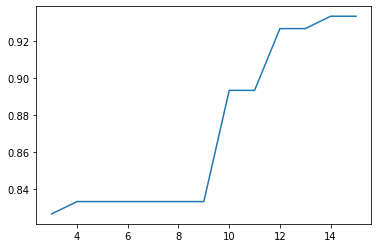

In [51]:
plt.plot(np.arange(3,15+1,dtype='int'),acumul)
plt.show()

### Conclusiones

A vista de los resultados obtenidos podemos concluir que con 3,8,9 y 10 cluster se obtienen los mejores resultados. La mayoría de resultados se encuentran entre el 60% y el 70% de acierto, destacando para 4 clusters que se obtiene una tasa de acierto bastante baja.